## modeling with AutoML

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate


In [2]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [3]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [4]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

C:\Users\user\AppData\Local\Temp\ipykernel_12536\2365867269.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)


In [5]:
eda_forecast

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [6]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

C:\Users\user\AppData\Local\Temp\ipykernel_12536\108906182.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()


In [7]:
solar_eda.dropna()

,year,month,day,hour,target,date
11,2020,9,10,11,733.260000,2020-09-10 11:00:00
12,2020,9,10,12,645.433333,2020-09-10 12:00:00
13,2020,9,10,13,605.308333,2020-09-10 13:00:00
14,2020,9,10,14,665.733333,2020-09-10 14:00:00
15,2020,9,10,15,522.251667,2020-09-10 15:00:00
...,...,...,...,...,...,...
14347,2022,4,30,19,0.850000,2022-04-30 19:00:00
14348,2022,4,30,20,0.000000,2022-04-30 20:00:00
14349,2022,4,30,21,0.000000,2022-04-30 21:00:00
14350,2022,4,30,22,0.000000,2022-04-30 22:00:00


In [8]:
incheon = real_weather[real_weather['지점명'] =='인천']

In [9]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)

In [10]:
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])

In [11]:
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

eda_weather.drop(['위도','경도'], axis=1, inplace=True)

In [12]:
eda_weather

,일시,기온,풍속,풍향,습도,강수량,hour,month,year
209952,2022-04-10 05:00:00,14.5,3.2,160.0,46.0,0.0,5,4,2022
209953,2022-04-10 00:00:00,15.5,3.9,160.0,42.0,0.0,0,4,2022
209954,2022-04-10 01:00:00,15.4,5.5,180.0,44.0,0.0,1,4,2022
209955,2022-04-10 02:00:00,15.2,4.4,160.0,45.0,0.0,2,4,2022
209956,2022-04-10 03:00:00,15.0,3.5,160.0,44.0,0.0,3,4,2022
...,...,...,...,...,...,...,...,...,...
227443,2022-12-09 01:00:00,3.6,2.3,140.0,59.0,0.0,1,12,2022
227444,2022-12-09 02:00:00,3.2,2.6,140.0,61.0,0.0,2,12,2022
227445,2022-12-08 21:00:00,4.0,1.5,140.0,54.0,0.0,21,12,2022
227446,2022-12-09 03:00:00,3.2,2.8,140.0,60.0,0.0,3,12,2022


In [13]:
eda_weather.set_index('일시', inplace=True)

In [14]:
eda_weather

,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,
2022-04-10 05:00:00,14.5,3.2,160.0,46.0,0.0,5,4,2022
2022-04-10 00:00:00,15.5,3.9,160.0,42.0,0.0,0,4,2022
2022-04-10 01:00:00,15.4,5.5,180.0,44.0,0.0,1,4,2022
2022-04-10 02:00:00,15.2,4.4,160.0,45.0,0.0,2,4,2022
2022-04-10 03:00:00,15.0,3.5,160.0,44.0,0.0,3,4,2022
...,...,...,...,...,...,...,...,...
2022-12-09 01:00:00,3.6,2.3,140.0,59.0,0.0,1,12,2022
2022-12-09 02:00:00,3.2,2.6,140.0,61.0,0.0,2,12,2022
2022-12-08 21:00:00,4.0,1.5,140.0,54.0,0.0,21,12,2022


In [15]:
solar_eda.set_index('date', inplace=True)

In [16]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [17]:
total_time

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00',
               '2022-04-30 18:00:00', '2022-04-30 19:00:00',
               '2022-04-30 20:00:00', '2022-04-30 21:00:00',
               '2022-04-30 22:00:00', '2022-04-30 23:00:00'],
              dtype='datetime64[ns]', length=11640, freq='H')

y = solar_eda.loc[total_time].target

In [18]:
solar_2.date = pd.to_datetime(solar_2.date)

In [19]:
solar_2.set_index('date', inplace=True)

In [20]:
y = solar_2.loc[total_time].value

In [21]:
y_input = y.loc[('2022-01-14 00:00:00' > y.index) | (y.index > '2022-01-17 23:00:00')]

In [22]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [23]:
x_input = x.loc[('2022-01-14 00:00:00' > x.index) | (x.index > '2022-01-17 23:00:00')]

In [24]:
x

,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,
2022-04-10 05:00:00,14.5,3.2,160.0,46.0,0.0,5,4,2022
2022-04-10 00:00:00,15.5,3.9,160.0,42.0,0.0,0,4,2022
2022-04-10 01:00:00,15.4,5.5,180.0,44.0,0.0,1,4,2022
2022-04-10 02:00:00,15.2,4.4,160.0,45.0,0.0,2,4,2022
2022-04-10 03:00:00,15.0,3.5,160.0,44.0,0.0,3,4,2022
...,...,...,...,...,...,...,...,...
2021-06-02 01:00:00,18.1,2.5,20.0,85.0,0.0,1,6,2021
2021-06-02 00:00:00,18.5,3.3,340.0,84.0,0.0,0,6,2021
2021-06-01 23:00:00,19.7,1.8,90.0,68.0,0.0,23,6,2021


In [25]:
y

2021-01-01 00:00:00      0.0
2021-01-01 01:00:00      0.0
2021-01-01 02:00:00      0.0
2021-01-01 03:00:00      0.0
2021-01-01 04:00:00      0.0
                       ...  
2022-04-30 19:00:00    144.0
2022-04-30 20:00:00      0.0
2022-04-30 21:00:00      0.0
2022-04-30 22:00:00      0.0
2022-04-30 23:00:00      0.0
Name: value, Length: 11640, dtype: float64

In [26]:
comm = y.index.intersection(x.index)

In [27]:
x = x.loc[comm]

In [28]:
y = y.loc[comm]

In [29]:
slice = round(len(x) * 0.75)

In [30]:
x_train = x_input.iloc[:slice]
x_test = x_input.iloc[slice:]
y_train = y_input.iloc[:slice]
y_test = y_input.iloc[slice:]

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
sc = StandardScaler()

In [33]:
mn = MinMaxScaler()

In [34]:
sc_x = mn.fit_transform(x)

In [35]:
sc_y = mn.fit_transform(y.values.reshape(-1,1))
sc_y_ = sc_y.reshape(-1)

In [36]:
sc_x_train = sc_x[:slice]
sc_x_test = sc_x[slice:]
sc_y_train = sc_y_[:slice]
sc_y_test = sc_y_[slice:]

In [37]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

8729 2814 8729 2815


In [38]:
from pycaret.regression import *

In [39]:
reg = setup(data = sc_x_train, 
            target = sc_y_train,
            fold=5)

In [40]:
best_model = compare_models(sort='RMSE', n_select=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:07:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [41]:
model_results = pull()

In [42]:
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0576,0.0130,0.1138,0.8196,0.0834,1.8676,0.308
lightgbm,Light Gradient Boosting Machine,0.0613,0.0130,0.1139,0.8194,0.0836,2.7857,0.182
xgboost,Extreme Gradient Boosting,0.0673,0.0137,0.1171,0.8091,0.0866,3.4355,0.226
et,Extra Trees Regressor,0.0596,0.0138,0.1175,0.8078,0.0860,2.0191,0.258
gbr,Gradient Boosting Regressor,0.0750,0.0154,0.1238,0.7867,0.0916,4.1446,0.250
knn,K Neighbors Regressor,0.0706,0.0167,0.1293,0.7675,0.0953,4.4555,0.170
ada,AdaBoost Regressor,0.0827,0.0195,0.1398,0.7290,0.1003,3.6663,0.176
dt,Decision Tree Regressor,0.0711,0.0240,0.1547,0.6674,0.1132,1.5310,0.158
ridge,Ridge Regression,0.1884,0.0587,0.2422,0.1869,0.1840,17.4922,0.360
lar,Least Angle Regression,0.1883,0.0587,0.2422,0.1868,0.1840,17.4894,0.156


In [43]:
best_model

[RandomForestRegressor(n_jobs=-1, random_state=8244),
 LGBMRegressor(random_state=8244),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=8244, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=8244),
 GradientBoostingRegressor(random_state=8244),
 KNeighborsRegressor(n_jobs=-1),
 AdaBoostRegressor(rando

In [44]:
lgbr = create_model('lightgbm')
rf = create_model('rf')
extra = create_model('et')
gradient = create_model('gbr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:07:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0594,0.0122,0.1106,0.8336,0.0814,2.4827
1,0.0659,0.0147,0.1211,0.7911,0.0902,2.7402
2,0.0580,0.0115,0.1075,0.8464,0.0776,1.3628
3,0.0617,0.0131,0.1145,0.8085,0.0831,5.2322
4,0.0612,0.0134,0.1159,0.8175,0.0857,2.1107
Mean,0.0613,0.0130,0.1139,0.8194,0.0836,2.7857
Std,0.0027,0.0011,0.0047,0.0193,0.0042,1.3084


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:07:47
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0574,0.0124,0.1115,0.8309,0.0815,1.7654
1,0.0621,0.0146,0.1206,0.7927,0.0896,2.2525
2,0.0524,0.0109,0.1045,0.8548,0.0758,0.9866
3,0.0561,0.0128,0.1133,0.8123,0.0820,2.9177
4,0.0600,0.0142,0.1191,0.8073,0.0880,1.4156
Mean,0.0576,0.0130,0.1138,0.8196,0.0834,1.8676
Std,0.0033,0.0013,0.0058,0.0214,0.0050,0.6696


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:07:48
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0591,0.0134,0.1159,0.8175,0.0846,1.7674
1,0.0637,0.0155,0.1245,0.7794,0.0921,2.4332
2,0.0549,0.0118,0.1088,0.8426,0.0791,0.9840
3,0.0587,0.0137,0.1169,0.8002,0.0847,3.4352
4,0.0616,0.0148,0.1215,0.7994,0.0895,1.4759
Mean,0.0596,0.0138,0.1175,0.8078,0.0860,2.0191
Std,0.0030,0.0012,0.0054,0.0212,0.0045,0.8493


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:07:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0737,0.0140,0.1185,0.8089,0.0876,3.2255
1,0.0796,0.0175,0.1322,0.7512,0.0982,3.4242
2,0.0718,0.0142,0.1191,0.8114,0.0876,1.8522
3,0.0742,0.0154,0.1240,0.7753,0.0913,8.1904
4,0.0759,0.0157,0.1253,0.7867,0.0933,4.0306
Mean,0.0750,0.0154,0.1238,0.7867,0.0916,4.1446
Std,0.0026,0.0012,0.0049,0.0223,0.0040,2.1448


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
lgbr_best = tune_model(lgbr)
rf_best = tune_model(rf)
extra_best = tune_model(extra)
gradient_best = tune_model(gradient)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:08:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0743,0.0204,0.1427,0.7229,0.1051,1.2790
1,0.0824,0.0252,0.1586,0.6416,0.1171,1.8256
2,0.0728,0.0206,0.1434,0.7264,0.1051,1.1056
3,0.0734,0.0211,0.1452,0.6918,0.1063,4.6388
4,0.0774,0.0225,0.1499,0.6948,0.1105,1.4744
Mean,0.0761,0.0219,0.1480,0.6955,0.1088,2.0647
Std,0.0035,0.0018,0.0059,0.0304,0.0046,1.3091


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0743,0.0204,0.1427,0.7229,0.1051,1.2790
1,0.0824,0.0252,0.1586,0.6416,0.1171,1.8256
2,0.0728,0.0206,0.1434,0.7264,0.1051,1.1056
3,0.0734,0.0211,0.1452,0.6918,0.1063,4.6388
4,0.0774,0.0225,0.1499,0.6948,0.1105,1.4744
Mean,0.0761,0.0219,0.1480,0.6955,0.1088,2.0647
Std,0.0035,0.0018,0.0059,0.0304,0.0046,1.3091


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:10:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1116,0.0402,0.2004,0.4539,0.1413,2.2973
1,0.1105,0.0405,0.2013,0.4226,0.1422,1.8022
2,0.1145,0.0433,0.2081,0.4241,0.1460,1.0978
3,0.1027,0.0352,0.1875,0.4860,0.1325,3.2498
4,0.1117,0.0404,0.2011,0.4505,0.1416,2.3224
Mean,0.1102,0.0399,0.1997,0.4474,0.1407,2.1539
Std,0.0040,0.0026,0.0067,0.0232,0.0045,0.7055


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1116,0.0402,0.2004,0.4539,0.1413,2.2973
1,0.1105,0.0405,0.2013,0.4226,0.1422,1.8022
2,0.1145,0.0433,0.2081,0.4241,0.1460,1.0978
3,0.1027,0.0352,0.1875,0.4860,0.1325,3.2498
4,0.1117,0.0404,0.2011,0.4505,0.1416,2.3224
Mean,0.1102,0.0399,0.1997,0.4474,0.1407,2.1539
Std,0.0040,0.0026,0.0067,0.0232,0.0045,0.7055


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:11:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0599,0.0118,0.1085,0.8398,0.0802,1.8580
1,0.0671,0.0149,0.1221,0.7878,0.0907,2.3327
2,0.0566,0.0112,0.1058,0.8513,0.0771,1.1281
3,0.0617,0.0136,0.1168,0.8006,0.0847,4.7682
4,0.0625,0.0140,0.1184,0.8095,0.0875,1.9797
Mean,0.0616,0.0131,0.1143,0.8178,0.0840,2.4134
Std,0.0034,0.0014,0.0062,0.0240,0.0049,1.2410


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0599,0.0118,0.1085,0.8398,0.0802,1.8580
1,0.0671,0.0149,0.1221,0.7878,0.0907,2.3327
2,0.0566,0.0112,0.1058,0.8513,0.0771,1.1281
3,0.0617,0.0136,0.1168,0.8006,0.0847,4.7682
4,0.0625,0.0140,0.1184,0.8095,0.0875,1.9797
Mean,0.0616,0.0131,0.1143,0.8178,0.0840,2.4134
Std,0.0034,0.0014,0.0062,0.0240,0.0049,1.2410


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [46]:
model_list = [lgbr_best, rf_best, extra_best, gradient_best]

In [47]:
blended = blend_models(estimator_list = model_list,
                       fold = 5,
                       optimize='MSE',
                       )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:11:30
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0576,0.0119,0.1091,0.8381,0.0801,1.8961
1,0.0636,0.0143,0.1198,0.7957,0.0891,2.3561
2,0.0542,0.0108,0.1042,0.8558,0.0756,1.0590
3,0.0583,0.0128,0.1132,0.8126,0.0820,3.7868
4,0.0598,0.0135,0.1162,0.8165,0.0859,1.6891
Mean,0.0587,0.0127,0.1125,0.8237,0.0825,2.1574
Std,0.0031,0.0012,0.0054,0.0210,0.0047,0.9153


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0576,0.0119,0.1091,0.8381,0.0801,1.8961
1,0.0636,0.0143,0.1198,0.7957,0.0891,2.3561
2,0.0542,0.0108,0.1042,0.8558,0.0756,1.0590
3,0.0583,0.0128,0.1132,0.8126,0.0820,3.7868
4,0.0598,0.0135,0.1162,0.8165,0.0859,1.6891
Mean,0.0587,0.0127,0.1125,0.8237,0.0825,2.1574
Std,0.0031,0.0012,0.0054,0.0210,0.0047,0.9153


In [48]:
final_model = finalize_model(blended)

In [49]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['feature_1', 'feature_2',
                                             'feature_3', 'feature_4',
                                             'feature_5', 'feature_6',
                                             'feature_7', 'feature_8'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='m...
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=8244)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=8244)),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=8,
                                                                        max_features=1.0,
                                                                        min_impurity_decrease=0.01,
                                                                        min_samples_leaf=4,
                                                                        min_samples_split=10,
                                                                        n_estimators=130,
                                                                        random_state=8244,
                                                                        subsample=0.35))],
                                 n_jobs=-1))])

In [50]:
final_result = predict_model(final_model, data=pd.DataFrame(sc_x_test, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']))

In [51]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [52]:
final_result.prediction_label

0       0.092005
1       0.002566
2      -0.000497
3      -0.002187
4      -0.001435
          ...   
2905    0.020710
2906    0.002977
2907    0.002792
2908    0.002927
2909    0.002321
Name: prediction_label, Length: 2910, dtype: float64

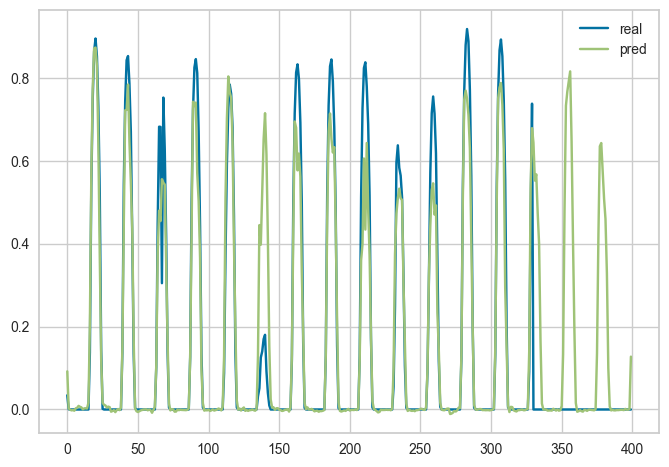

In [53]:
plt.plot(sc_y_test[:400], label='real')
plt.plot(final_result.prediction_label[:400], label='pred')
plt.legend()
plt.show()

In [54]:
lig_result = predict_model(lgbr_best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0575,0.0113,0.1063,0.8432,0.0779,2.1577


In [55]:
evaluate_model(lgbr_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
lig_result

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
1,0.188350,0.153226,0.138889,0.609195,0.0,0.043478,0.0,0.0,0.000000,-0.008244
5,0.186408,0.250000,0.555556,0.597701,0.0,0.217391,0.0,0.0,0.000000,-0.003357
9,0.223301,0.137097,0.444444,0.551724,0.0,0.391304,0.0,0.0,0.160673,0.123354
13,0.341748,0.225806,0.500000,0.482759,0.0,0.565217,0.0,0.0,0.193476,0.670671
16,0.333981,0.161290,0.638889,0.655172,0.0,0.695652,0.0,0.0,0.128427,0.276369
...,...,...,...,...,...,...,...,...,...,...
8711,0.308738,0.362903,0.750000,0.620690,0.0,1.000000,1.0,0.0,0.000000,-0.018047
8712,0.299029,0.362903,0.805556,0.609195,0.0,0.000000,1.0,0.0,0.000000,-0.008122
8716,0.248544,0.250000,0.888889,0.528736,0.0,0.173913,1.0,0.0,0.000000,-0.002215
8724,0.308738,0.161290,0.750000,0.252874,0.0,0.521739,1.0,0.0,0.836725,0.840355


lig_result[['target','prediction_label']].iloc[250:300,:].plot()